# Final Project Data Science Course
## Santiago Granda

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2.0,-122.323148,47.703140,1.0,1307.0,1307.0,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
1,1.0,-122.347294,47.647172,2.0,52200.0,52200.0,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0.0,0.0,N
2,1.0,-122.334540,47.607871,3.0,26700.0,26700.0,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0.0,0.0,N
3,1.0,-122.334803,47.604803,4.0,1144.0,1144.0,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0.0,0.0,N
4,2.0,-122.306426,47.545739,5.0,17700.0,17700.0,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0.0,0.0,N
5,1.0,-122.387598,47.690575,6.0,320840.0,322340.0,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0.0,0.0,N
6,1.0,-122.338485,47.618534,7.0,83300.0,83300.0,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0.0,0.0,N
7,2.0,-122.320780,47.614076,9.0,330897.0,332397.0,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855.0,0.0,N
8,1.0,-122.335930,47.611904,10.0,63400.0,63400.0,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0.0,0.0,N
9,2.0,-122.384700,47.528475,12.0,58600.0,58600.0,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0.0,0.0,N


## Data Wrangling

In [3]:
# Features to drop
# x, y, objectid, inckey, coldetkey, reportno, status, intkey, location, exceptrsncode, exceptrsndesc, incdttm, sdot_colcode, sdot_coldesc, sdotcolnum, st_colcode, st_coldesc, seglanekey, crosswalkkey 

df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'SEVERITYCODE1', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYDESC', 'INCDTTM', 'SDOTCOLNUM','SDOT_COLCODE', 'SDOT_COLDESC', 'JUNCTIONTYPE', 'ST_COLCODE', 'PEDROWNOTGRNT', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY'], axis=1, inplace = True)
df.drop(df.index[[194673,194674,194675,194676]], inplace = True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194673 entries, 0 to 194672
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  float64
 1   ADDRTYPE        192747 non-null  object 
 2   COLLISIONTYPE   189769 non-null  object 
 3   PERSONCOUNT     194673 non-null  float64
 4   PEDCOUNT        194673 non-null  float64
 5   PEDCYLCOUNT     194673 non-null  float64
 6   VEHCOUNT        194673 non-null  float64
 7   INCDATE         194673 non-null  object 
 8   INATTENTIONIND  29805 non-null   object 
 9   UNDERINFL       189789 non-null  object 
 10  WEATHER         189592 non-null  object 
 11  ROADCOND        189661 non-null  object 
 12  LIGHTCOND       189503 non-null  object 
 13  SPEEDING        9333 non-null    object 
 14  HITPARKEDCAR    194673 non-null  object 
dtypes: float64(5), object(10)
memory usage: 16.3+ MB


In [5]:
print('Missing values Severity code:', df["SEVERITYCODE"].isna().sum(), '\n'
    'Missing values address type:', df["ADDRTYPE"].isna().sum(), '\n'
    'Missing values Collision Type:', df["COLLISIONTYPE"].isna().sum(), '\n'
    'Missing values Person count:', df["PERSONCOUNT"].isna().sum(), '\n'
    'Missing values Pedestrians count:', df["PEDCOUNT"].isna().sum(),'\n'
    'Missing values Bicycles count:', df["PEDCYLCOUNT"].isna().sum(), '\n'
    'Missing values Vehicles count:', df["VEHCOUNT"].isna().sum(), '\n'
    'Missing values Incident date:', df["INCDATE"].isna().sum(),'\n'
    'Missing values Inattention index:', df["INATTENTIONIND"].isna().sum(), '\n'
    'Missing values Underinfluence of index:', df["UNDERINFL"].isna().sum(),'\n'
    'Missing values Weather conditions:', df["WEATHER"].isna().sum(), '\n'
    'Missing values Road conditions:', df["ROADCOND"].isna().sum(), '\n'
    'Missing values Light conditions:', df["LIGHTCOND"].isna().sum(), '\n'
    'Missing values Speeding index:', df["SPEEDING"].isna().sum(), '\n'
    'Missing values Hit parked car index:', df["HITPARKEDCAR"].isna().sum())   
    

Missing values Severity code: 0 
Missing values address type: 1926 
Missing values Collision Type: 4904 
Missing values Person count: 0 
Missing values Pedestrians count: 0 
Missing values Bicycles count: 0 
Missing values Vehicles count: 0 
Missing values Incident date: 0 
Missing values Inattention index: 164868 
Missing values Underinfluence of index: 4884 
Missing values Weather conditions: 5081 
Missing values Road conditions: 5012 
Missing values Light conditions: 5170 
Missing values Speeding index: 185340 
Missing values Hit parked car index: 0


In [6]:
# Replace the Inatention ID by 0 if it's a NAN and by 1 if it is Yes 

df['INATTENTIONIND'].fillna(0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['INATTENTIONIND'].value_counts()

0    164868
1     29805
Name: INATTENTIONIND, dtype: int64

In [7]:
# Replace the Speeding NAN by 0 and Y by 1

df['SPEEDING'].fillna(0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['SPEEDING'].value_counts()

0    185340
1      9333
Name: SPEEDING, dtype: int64

In [8]:
# Replace the Underinfluence N by 0 and Y by 1 

df['UNDERINFL'].fillna(0, inplace = True)
df['UNDERINFL'].replace('N', 0, inplace = True)
df['UNDERINFL'].replace('0', 0, inplace = True)
df['UNDERINFL'].replace('1', 1, inplace = True)
df['UNDERINFL'].replace('Y', 1, inplace = True)
df['UNDERINFL'].value_counts()

0    185552
1      9121
Name: UNDERINFL, dtype: int64

In [9]:
# Replace the Hit parked car N and Y by 0 and 1

df['HITPARKEDCAR'].replace('N', 0, inplace = True)
df['HITPARKEDCAR'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].value_counts()

0    187457
1      7216
Name: HITPARKEDCAR, dtype: int64

In [10]:
#Drop the rows where data is missing
df = df.dropna()
# Observe if there is missing values on the dataset
df.isna().sum()

SEVERITYCODE      0
ADDRTYPE          0
COLLISIONTYPE     0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INCDATE           0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
HITPARKEDCAR      0
dtype: int64

In [11]:
# Weather Conditions
df['WEATHER'].value_counts()

Clear                       110493
Raining                      32969
Overcast                     27545
Unknown                      14057
Snowing                        896
Other                          790
Fog/Smog/Smoke                 563
Sleet/Hail/Freezing Rain       112
Blowing Sand/Dirt               49
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [12]:
# Observing the weather characteristics of the dataset, each atmospheric condition is changed with a code as follows:
# 0: Clear, 1: Raining, 2: Overcast, 3: Unknown, 4: Snowing, 5: Other, 6: Fog/Smog, 7: Sleet/Freezing Rain, 8: Blowing sand/Dirt, 9: Severe Crosswind, 10: Partly Cloudy

labelw=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy']

for i in range(len(labelw)):
    df['WEATHER'].replace(labelw[i], i, inplace = True)

df['WEATHER'].value_counts()




0     110493
1      32969
2      27545
3      14057
4        896
5        790
6        563
7        112
8         49
9         25
10         5
Name: WEATHER, dtype: int64

In [13]:
# Road Conditions
df["ROADCOND"].value_counts()

Dry               123730
Wet                47213
Unknown            14005
Ice                 1192
Snow/Slush           992
Other                124
Standing Water       111
Sand/Mud/Dirt         73
Oil                   64
Name: ROADCOND, dtype: int64

In [14]:
# Observing the road conditions of the dataset, each condition is changed with a code as follows:
# 0: Dry, 1: Wet, 2: Unknown, 3: Ice, 4: Snow/Slush, 5: Other, 6: Standing Water, 7: Sand/Mud/Dirt, 8: Oil
labelr=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil']

for i in range(len(labelr)):
    df["ROADCOND"].replace(labelr[i], i, inplace = True)

df['ROADCOND'].value_counts()



0    123730
1     47213
2     14005
3      1192
4       992
5       124
6       111
7        73
8        64
Name: ROADCOND, dtype: int64

In [15]:
# Light Condition
df['LIGHTCOND'].value_counts()

Daylight                    115395
Dark - Street Lights On      48233
Unknown                      12597
Dusk                          5842
Dawn                          2490
Dark - No Street Lights       1525
Dark - Street Lights Off      1184
Other                          227
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

In [16]:
# Observing the illumination conditions of the dataset, each condition is changed with a code as follows:
# 0: Daylight, 1: Dark Street lights on, 2: Unknown, 3: Dusk, 4: Dawn, 5: Dark No streeet lights, 6: Other
label=['Daylight','Dark - Street Lights On','Dark - Unknown Lighting','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other']
value=[0,1,1,2,3,4,5,5,6]

for i,j in zip(label,value):
    df['LIGHTCOND'].replace(i, j, inplace = True)

df['LIGHTCOND'].value_counts()



0    115395
1     48244
2     12597
3      5842
5      2709
4      2490
6       227
Name: LIGHTCOND, dtype: int64

In [17]:
# Address Type
df['ADDRTYPE'].value_counts()

Block           123315
Intersection     63447
Alley              742
Name: ADDRTYPE, dtype: int64

In [18]:
#Observing the address types of the dataset, each type is changed with a code as follows:
# 0: Block, 1: Intersection, 2: Alley

labeladdr = ['Block','Intersection','Alley']

for i in range(len(labeladdr)):
    df['ADDRTYPE'].replace(labeladdr[i], i, inplace = True)

df['ADDRTYPE'].value_counts()

0    123315
1     63447
2       742
Name: ADDRTYPE, dtype: int64

In [19]:
df['COLLISIONTYPE'].value_counts()

Parked Car    46679
Angles        34555
Rear Ended    33794
Other         23440
Sideswipe     18442
Left Turn     13659
Pedestrian     6589
Cycles         5399
Right Turn     2936
Head On        2011
Name: COLLISIONTYPE, dtype: int64

In [20]:
#Observing the junction types of the dataset, each type is changed with a code as follows:
#  0: Parked Car, 1: Angles, 2: Rear Ended, 3: Other, 4: Sideswipe, 5: Left Turn, 6: Pedestrian, 7: Cycles, 8: Right Turn, 9: Head On
coltype = ['Parked Car', 'Angles', 'Rear Ended', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On']
for i in range(len(coltype)):
    df['COLLISIONTYPE'].replace(coltype[i], i, inplace = True)

df['COLLISIONTYPE'].value_counts()

0    46679
1    34555
2    33794
3    23440
4    18442
5    13659
6     6589
7     5399
8     2936
9     2011
Name: COLLISIONTYPE, dtype: int64

In [21]:
#Working with the date 
df['INCDATE'] = pd.to_datetime(df['INCDATE'], format='%Y-%m-%d')
df['year'] = df['INCDATE'].dt.year
df['month'] = df['INCDATE'].dt.month
df['weekday'] = df['INCDATE'].dt.weekday

## Features visualization according to the severity code

Text(0, 0.5, 'Number of accidents')

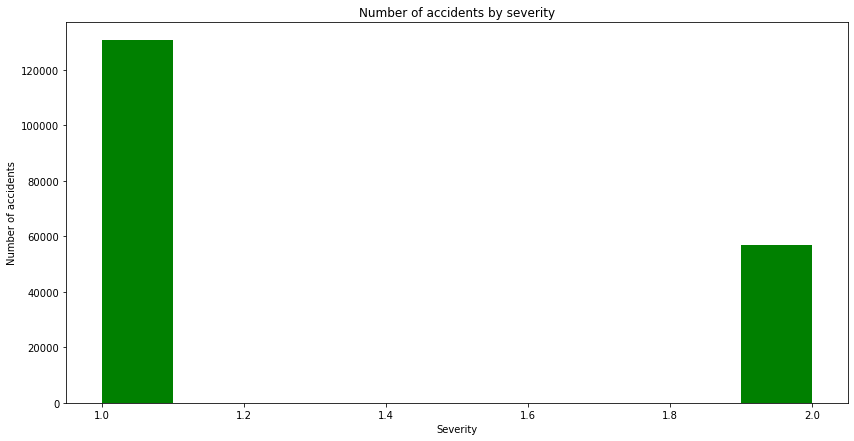

In [22]:
# Count the number of accidents de to its severity code
y = df['SEVERITYCODE'].values
plt.figure(figsize=(14, 7))
plt.hist(y, color = 'g')
plt.title('Number of accidents by severity')
plt.xlabel('Severity')
plt.ylabel('Number of accidents')

Text(0.5, 1.0, 'Inattention Count')

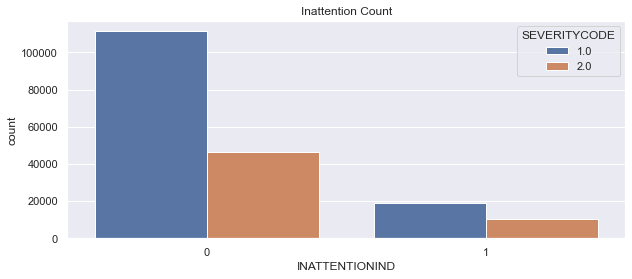

In [23]:
# For inattention id
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'INATTENTIONIND', hue = 'SEVERITYCODE', data = df).set_title('Inattention Count')

Text(0.5, 1.0, 'Speeding index')

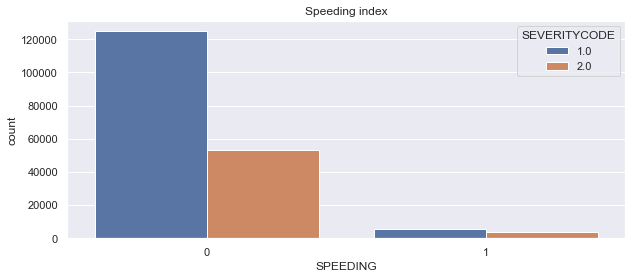

In [24]:
# For the Speeding feature
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'SPEEDING', hue = 'SEVERITYCODE', data = df).set_title('Speeding index')

Text(0.5, 1.0, 'Underinfluence of substances')

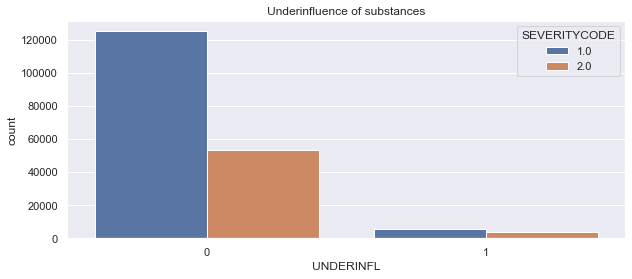

In [25]:
# For the underinfluence of substances variable
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'UNDERINFL', hue = 'SEVERITYCODE', data = df).set_title('Underinfluence of substances')

Text(0.5, 1.0, 'Parked Car')

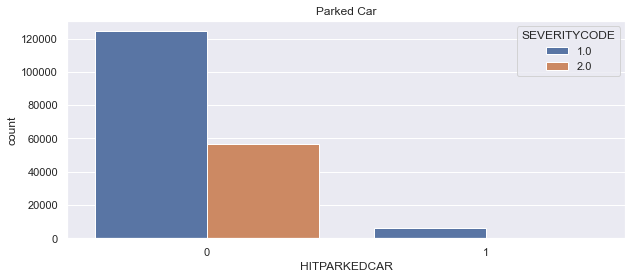

In [26]:
# For the hit parked car variable
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'HITPARKEDCAR', hue = 'SEVERITYCODE', data = df).set_title('Parked Car')

Text(0.5, 1.0, 'Weather Condition')

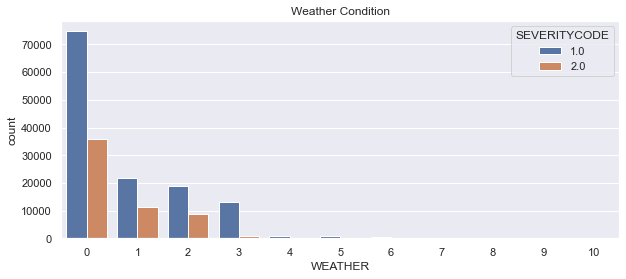

In [27]:
# For the Weather feature
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'WEATHER', hue = 'SEVERITYCODE', data = df).set_title('Weather Condition')

Text(0.5, 1.0, 'Road Condition')

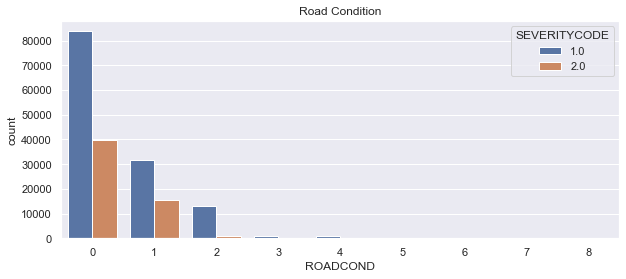

In [28]:
# For the road condition feature
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'ROADCOND', hue = 'SEVERITYCODE', data = df).set_title('Road Condition')

Text(0.5, 1.0, 'Light Condition')

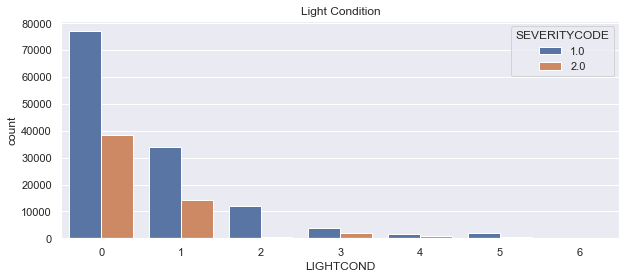

In [29]:
# For the light condition feature
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'LIGHTCOND', hue = 'SEVERITYCODE', data = df).set_title('Light Condition')


Text(0.5, 1.0, 'Address Type')

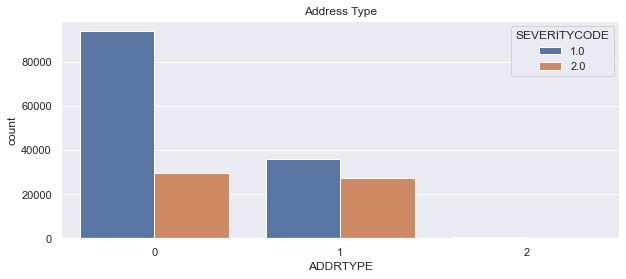

In [30]:
# For the type of address where the collision took place
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'ADDRTYPE', hue = 'SEVERITYCODE', data = df).set_title('Address Type')

Text(0.5, 1.0, 'Type of collision')

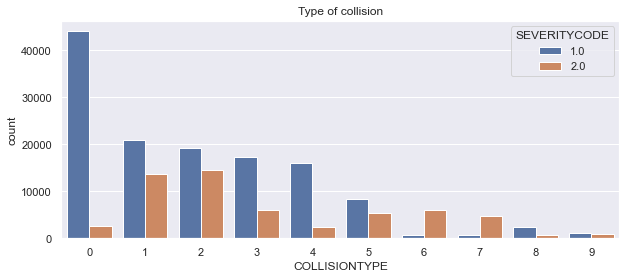

In [31]:
# For the type of collision
sns.set(rc={'figure.figsize':(10,4)})
sns.countplot(x = 'COLLISIONTYPE', hue = 'SEVERITYCODE', data = df).set_title('Type of collision')

## Data Analysis

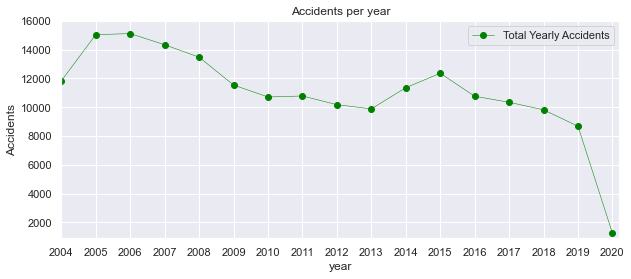

In [32]:
# Graph representing the total yearly accidents from 2004 to the present
yearlyacc = df[['year','SEVERITYCODE']].groupby(df['year']).count()
yearlyacc['SEVERITYCODE'].plot.line(figsize=(10,4), marker='o', linewidth=0.5, color='green', label='Total Yearly Accidents')
plt.title('Accidents per year')
plt.xticks(range(2004,2021))
plt.xlim(2004,2020.2)
plt.ylim(900,16000)
plt.ylabel('Accidents')
plt.legend()

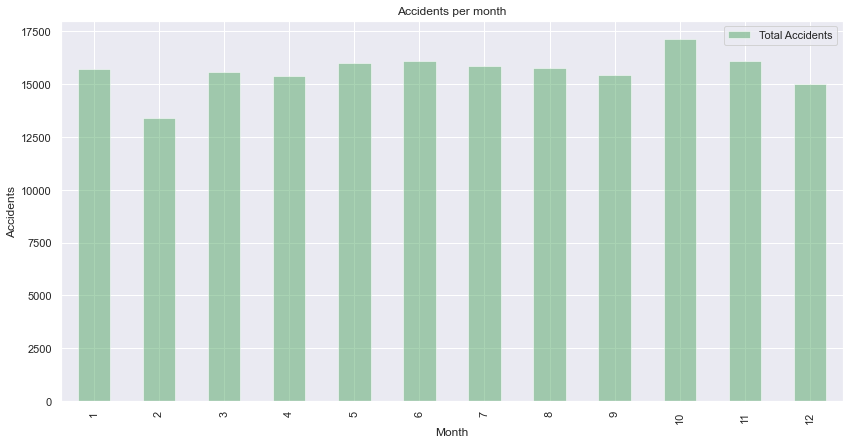

In [33]:
# Monthly accidents

monthlyacc = df[['month', 'SEVERITYCODE']].groupby(['month']).count()

monthlyacc['SEVERITYCODE'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total Accidents')
plt.title('Accidents per month')
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

###  Correlation

In [34]:
df[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR',
    'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 
    'PEDCYLCOUNT', 'VEHCOUNT']].corr()['SEVERITYCODE'].sort_values(ascending=False)

SEVERITYCODE      1.000000
COLLISIONTYPE     0.257085
PEDCOUNT          0.247915
PEDCYLCOUNT       0.215361
ADDRTYPE          0.187666
PERSONCOUNT       0.128368
INATTENTIONIND    0.044013
UNDERINFL         0.042779
SPEEDING          0.037254
LIGHTCOND        -0.078143
VEHCOUNT         -0.081014
ROADCOND         -0.099628
HITPARKEDCAR     -0.100308
WEATHER          -0.101103
Name: SEVERITYCODE, dtype: float64

### Feature Preparation

#### X represents the independet variables, and y is the target or the dependent variable

In [35]:
X = df[['INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'HITPARKEDCAR',
    'WEATHER', 'ROADCOND', 'LIGHTCOND', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 
    'PEDCYLCOUNT', 'VEHCOUNT']].values 
X[0:5]

array([[0., 0., 0., 0., 2., 1., 0., 1., 1., 2., 0., 0., 2.],
       [0., 0., 0., 0., 1., 1., 1., 0., 4., 2., 0., 0., 2.],
       [0., 0., 0., 0., 2., 0., 0., 0., 0., 4., 0., 0., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 3., 3., 0., 0., 3.],
       [0., 0., 0., 0., 1., 1., 0., 1., 1., 2., 0., 0., 2.]])

In [36]:
y = df['SEVERITYCODE'].values
y.astype(int)
y[0:5]

array([2., 1., 1., 1., 2.])

In [37]:
# Data Normalization
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.43285729, -0.22541839, -0.22799291, -0.1916055 ,  1.12721903,
         0.72653972, -0.6051541 ,  1.35054525, -0.60967489, -0.3408128 ,
        -0.19081036, -0.17240283,  0.05267307],
       [-0.43285729, -0.22541839, -0.22799291, -0.1916055 ,  0.21781956,
         0.72653972,  0.37445252, -0.71542879,  0.78479132, -0.3408128 ,
        -0.19081036, -0.17240283,  0.05267307],
       [-0.43285729, -0.22541839, -0.22799291, -0.1916055 ,  1.12721903,
        -0.60345895, -0.6051541 , -0.71542879, -1.07449696,  1.12974361,
        -0.19081036, -0.17240283,  1.84025879],
       [-0.43285729, -0.22541839, -0.22799291, -0.1916055 , -0.6915799 ,
        -0.60345895, -0.6051541 , -0.71542879,  0.31996925,  0.3944654 ,
        -0.19081036, -0.17240283,  1.84025879],
       [-0.43285729, -0.22541839, -0.22799291, -0.1916055 ,  0.21781956,
         0.72653972, -0.6051541 ,  1.35054525, -0.60967489, -0.3408128 ,
        -0.19081036, -0.17240283,  0.05267307]])

In [38]:
# Train/Test dataset split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 4)
print ('Train set:', Xtrain.shape,  ytrain.shape)
print ('Test set:', Xtest.shape,  ytest.shape)

Train set: (150003, 13) (150003,)
Test set: (37501, 13) (37501,)


## Model Development

### Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, jaccard_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
#To Calculate the best value of C
accuracy=np.zeros(7)
i=0
for c in [0.1, 0.01, 0.001, 0.0001, 0.5, 1, 10]:
    LogReg = LogisticRegression(C=c, solver='liblinear').fit(Xtrain, ytrain)
    yhat1 = LogReg.predict(Xtest)
    accuracy[i] = accuracy_score(ytest,yhat1)
    i+=1
accuracy


array([0.75006   , 0.74960668, 0.74923335, 0.74667342, 0.75006   ,
       0.75006   , 0.75006   ])

In [40]:
# Logistic regression model development
LogReg = LogisticRegression(C = 0.001, solver = 'lbfgs').fit(Xtrain, ytrain) 
yhatLogR = LogReg.predict(Xtest)
yhat_prob = LogReg.predict_proba(Xtest)
yhat_prob

array([[0.7628418 , 0.2371582 ],
       [0.56299142, 0.43700858],
       [0.81079684, 0.18920316],
       ...,
       [0.79672072, 0.20327928],
       [0.81079684, 0.18920316],
       [0.87553525, 0.12446475]])

### K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

Ks=10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = []
for n in range(1,Ks):
    print(n)    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(Xtrain, ytrain)
    yhatKnn=neigh.predict(Xtest)
    mean_acc[n-1] = accuracy_score(ytest, yhatKnn) 
    std_acc[n-1]=np.std(yhatKnn==ytest)/np.sqrt(yhatKnn.shape[0])

mean_acc

1
2
3
4
5
6
7
8
9


array([0.70286126, 0.73440708, 0.72955388, 0.73915362, 0.73728701,
       0.74483347, 0.73656702, 0.74211354, 0.73992694])

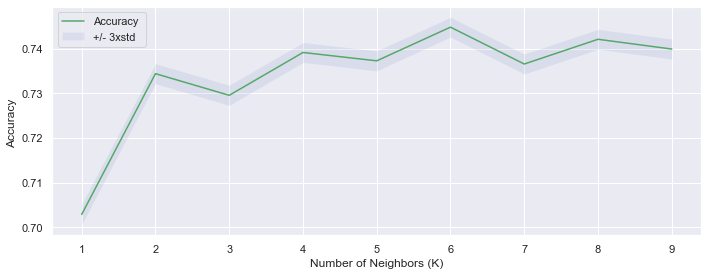

In [42]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [43]:
# Due to processing time, for the analysis of this project 10 iterations are analyzed for the purposes of the project
print( "The best accuracy was:", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
#Training with the best value of K
k = 6
neigh = KNeighborsClassifier(n_neighbors=k).fit(Xtrain, ytrain)
#Testing and predicting
yhatKnnf=neigh.predict(Xtest) 
yhatKnnf[0:5]

The best accuracy was: 0.7448334711074371 with k= 6


array([1., 1., 1., 1., 1.])

### Decision tree

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
decTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
decTree.fit(Xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [46]:
yhatTree = decTree.predict(Xtest)

## Evaluation

In [47]:
from sklearn.metrics import accuracy_score, log_loss, jaccard_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

### Logistic Regression

In [48]:
# Using jaccard index to analyze the accuracy of the model Logistic regression
print('Jaccard Score for Logistic Regression: ', jaccard_score(ytest, yhatLogR))

Jaccard Score for Logistic Regression:  0.729697039511577


In [49]:
# F1 score
print('F1 score for Logistic regression: ', f1_score(ytest, yhatLogR))

F1 score for Logistic regression:  0.8437281475808331


In [50]:
print('Logarithmic loss for Logistic regression: ', log_loss(ytest, yhat_prob))

Logarithmic loss for Logistic regression:  0.5223867518816201


In [51]:
print('Accuracy score for Logistic regression: ', accuracy_score(ytest, yhatLogR))

Accuracy score for Logistic regression:  0.7497133409775739


### Decision tree

In [52]:
print('F1 score for Decision tree: ', f1_score(ytest, yhatTree))

F1 score for Decision tree:  0.8459559009031737


In [53]:
print('Jaccard Score for Decision tree: ', jaccard_score(ytest, yhatTree))

Jaccard Score for Decision tree:  0.7330360265827213


In [54]:
print('Accuracy score for Decision tree: ', accuracy_score(ytest, yhatTree))

Accuracy score for Decision tree:  0.7557665128929896


### KNN Evaluation

In [55]:
print('F1 score for KNN: ', f1_score(ytest, yhatKnnf))

F1 score for KNN:  0.834689470501857


In [56]:
print('Jaccard Score for KNN: ', jaccard_score(ytest, yhatKnnf))

Jaccard Score for KNN:  0.7162807246419782


In [57]:
print('Accuracy score for KNN: ', accuracy_score(ytest, yhatKnnf))

Accuracy score for KNN:  0.7448334711074371


## Report

|      Algorithm      | Jaccard | F1-Score | Accuracy-Score | LogLoss |
|:-------------------:|:-------:|:--------:|:--------------:|:-------:|
| Logistic Regression | 0.72969 |  0.84373 |     0.74971    |  0.5224 |
|         Knn         | 0.71628 |  0.83469 |     0.74483    |   N/A   |
|    Decision Tree    | 0.73303 |  0.84595 |     0.75576    |   N/A   |